## Feature Engineering
On the website Kaggle.com, prospective data scientists compete against each other.  Each tries to develop a model that is better than the others. You might ask yourself: if everyone has the same data, then how do some do better than others?

The answer is "feature engineering". A feature is a measurable characteristic or property that provides information for a machine learning model. 

Let's assume our goal in this analysis is to understand how Zillow's ZESTIMATE price  is determined. What value, for example do the number of bedrooms, bathrooms, etc. play?  But that isn't really feature engineering! **You have those columns already.**  If you were competing on Kaggle, limiting your features to the data that you have wouldn't move you to the head of the pack. 

Feature engineering takes time, energy, and insight. It can require detective work and research beyond what is in the data.  It can involve combinining or leveraging the columnar data in unique and imaginative ways.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
df = pd.read_csv('OldNewark.csv')
df

,ID,STREETNO,STREET,ZESTIMATE,SQFT,BEDR,BATHR,YRBUILT,LOTSIZE,SOLDFOR,YRSOLD
0,150,504,Apple,244069,1960,3,2.0,1400,0.36,NaN,NaN
1,151,602,Apple,259061,1963,3,2.0,1950,0.29,250000.0,2006.0
2,23,120,Townsend,303508,1800,3,3.0,1903,0.35,183000.0,1997.0
3,95,56,Sunset,307445,2186,4,3.0,1915,0.26,532000.0,2007.0
4,99,45,Sunset,297546,1625,3,1.5,1915,0.27,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
161,98,52,Sunset,303987,2050,3,3.0,1985,0.26,NaN,NaN
162,97,54,Sunset,296163,1800,3,1.0,1986,0.26,NaN,NaN
163,115,17,Indian,342428,2350,3,2.5,1987,0.33,40100.0,1986.0
164,74,124,Winslow,349367,2225,4,2.5,1989,0.49,38500.0,1987.0


In [23]:
df.columns

Index(['ID', 'STREETNO', 'STREET', 'ZESTIMATE', 'SQFT', 'BEDR', 'BATHR',
       'YRBUILT', 'LOTSIZE', 'SOLDFOR', 'YRSOLD'],
      dtype='object')

Some explanations:
* ZESTIMATE: This is the Zillow.com estimate of the house's value
* SQFT: Square footage of the house
* LOTSIZE: size of the lot, in acres
* SOLDFOR: This is the amount that the house last sold for.
* YRSOLD: This is the date that the house was last purchased

In [24]:
df.isnull().sum()

ID            0
STREETNO      0
STREET        0
ZESTIMATE     0
SQFT          0
BEDR          0
BATHR         0
YRBUILT       0
LOTSIZE       0
SOLDFOR      44
YRSOLD       44
dtype: int64

In [25]:
df['STREET'].value_counts()

Apple       44
Beverly     33
Sunset      23
Winslow     22
Orchard     19
Townsend    11
Indian       8
Grantham     6
Name: STREET, dtype: int64

### Swim in your data

Take a few minutes to explore the OldNewark dataset.  Print out the first five rows or so.  Run descriptive statistics, do some histogram plots, and run some value counts.  You might run some example scatterplots.  Scatterplots that approximate a line are good candidates for regression.  Scatterplots that look like a blob do not!

__MOST IMPORTANTLY: TAKE YOUR TIME AT THIS STAGE.  Good data scientists spend only about 10% of their time running stats models.  Most of the time is understanding the data and doing feature engineering (which we will do in a minute).  REMEMBER: The stats models are easy.  Understanding the data is harder (but critical)!__

### Reflection 
Write out at least five **interesting** things you have learned about the data.  You could comment on:
* Ranges of different columns (low and high values)
* Distributions (e.g., using histograms, etc.)
* Identification of possible outliers
* Trends (from scatterplots)
* Descriptive stats
* Missing data.  Why do certain columns have so many missing values and other do not?  Is this a problem?
* Value counts
* Correlations
* Anything else you notice

In [26]:
df['ZESTIMATE'].groupby(df['STREET']).mean()

STREET
Apple       267425.363636
Beverly     283566.060606
Grantham    292952.500000
Indian      321595.875000
Orchard     392737.052632
Sunset      295282.304348
Townsend    352095.727273
Winslow     338099.227273
Name: ZESTIMATE, dtype: float64

In [27]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,166.0,83.500000,48.064193,1.00,42.2500,83.500,124.75,166.00
STREETNO,166.0,248.204819,163.428996,15.00,121.7500,230.000,378.00,611.00
ZESTIMATE,166.0,307347.054217,66620.775343,196710.00,268143.2500,298821.000,340988.00,613238.00
SQFT,166.0,2174.728916,682.799979,1050.00,1750.0000,2125.000,2518.75,5427.00
BEDR,166.0,3.512048,0.744580,1.00,3.0000,3.000,4.00,6.00
BATHR,166.0,2.328313,0.848731,1.00,2.0000,2.000,2.50,6.50
YRBUILT,166.0,1951.319277,45.388697,1400.00,1949.0000,1957.000,1961.00,2004.00
LOTSIZE,166.0,0.335301,0.087044,0.17,0.2725,0.315,0.37,0.68
SOLDFOR,122.0,260441.180328,128707.344343,12000.00,172850.0000,258125.000,340000.00,600000.00
YRSOLD,122.0,2004.950820,12.306588,1971.00,1999.2500,2006.500,2016.00,2019.00


* Average ZESTIMATE is \\$305K, but avg SOLDFOR is \\$260K.  Average YRSOLD is 2005.
* Average size house is 2138 SQFT with 3.5 BEDR and 2.5 BATHS
* On avg houses were built in 1947, but std dev is fairly high (54 yrs)

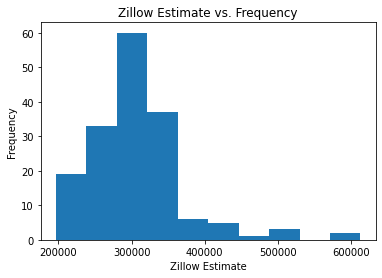

In [28]:
plt.title('Zillow Estimate vs. Frequency')
plt.xlabel('Zillow Estimate')
plt.ylabel('Frequency')
plt.hist(df['ZESTIMATE'])
plt.show()

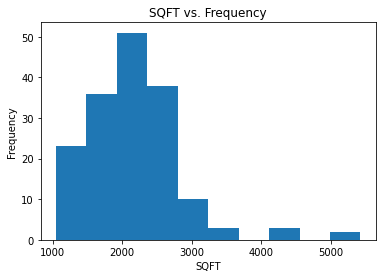

In [29]:
plt.title('SQFT vs. Frequency')
plt.xlabel('SQFT')
plt.ylabel('Frequency')
plt.hist(df['SQFT'])
plt.show()

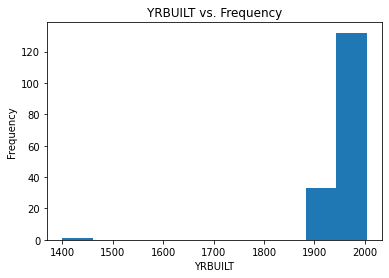

In [30]:
plt.title('YRBUILT vs. Frequency')
plt.xlabel('YRBUILT')
plt.ylabel('Frequency')
plt.hist(df['YRBUILT'])
plt.show()

**From descriptive statistics we noticed that 1400 in YRBUILT is an outlier and probably a mistake in the data entry. In the following, I check the house for which we have YRBUILT=1400. It seems like the value under SQFT is actually the YRBUILT and the value under YRBUILT is actually the SQFT. Therefore, we are going to fix this mistake.**

In [31]:
df.loc[df['YRBUILT'] == 1400]

,ID,STREETNO,STREET,ZESTIMATE,SQFT,BEDR,BATHR,YRBUILT,LOTSIZE,SOLDFOR,YRSOLD
0,150,504,Apple,244069,1960,3,2.0,1400,0.36,NaN,NaN


In [32]:
df.loc[df['YRBUILT'] == 1400, 'YRBUILT'] = 1960
df.loc[df['SQFT'] == 1960, 'SQFT'] = 1400

In [33]:
df.corr()

,ID,STREETNO,ZESTIMATE,SQFT,BEDR,BATHR,YRBUILT,LOTSIZE,SOLDFOR,YRSOLD
ID,1.000000,0.340771,-0.444298,-0.214015,-0.003133,-0.279344,0.433442,-0.246499,-0.377508,-0.084401
STREETNO,0.340771,1.000000,-0.422981,-0.245099,-0.034934,-0.262255,0.209009,-0.156489,-0.130535,0.102945
ZESTIMATE,-0.444298,-0.422981,1.000000,0.734791,0.363996,0.706982,-0.192363,0.340007,0.497601,0.047970
SQFT,-0.214015,-0.245099,0.734791,1.000000,0.405574,0.657077,0.068036,0.276527,0.280854,-0.069698
BEDR,-0.003133,-0.034934,0.363996,0.405574,1.000000,0.494798,0.009682,0.136471,0.175498,-0.042371
BATHR,-0.279344,-0.262255,0.706982,0.657077,0.494798,1.000000,-0.078297,0.251942,0.286011,-0.056447
YRBUILT,0.433442,0.209009,-0.192363,0.068036,0.009682,-0.078297,1.000000,-0.046505,-0.399611,-0.154098
LOTSIZE,-0.246499,-0.156489,0.340007,0.276527,0.136471,0.251942,-0.046505,1.000000,0.132217,0.003346
SOLDFOR,-0.377508,-0.130535,0.497601,0.280854,0.175498,0.286011,-0.399611,0.132217,1.000000,0.635992
YRSOLD,-0.084401,0.102945,0.047970,-0.069698,-0.042371,-0.056447,-0.154098,0.003346,0.635992,1.000000


**Scatterplot**

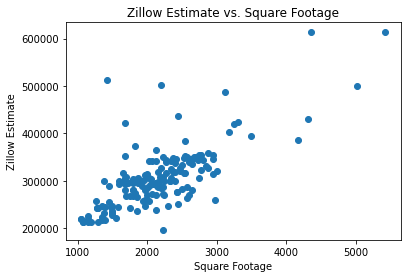

In [34]:
plt.title('Zillow Estimate vs. Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Zillow Estimate')
plt.scatter(df['SQFT'], df['ZESTIMATE'])

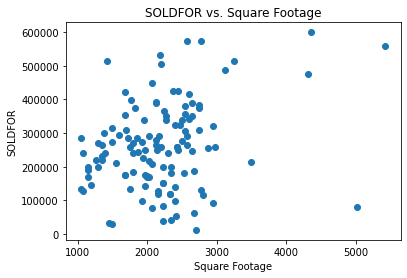

In [35]:
plt.title('SOLDFOR vs. Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('SOLDFOR')
plt.scatter(df['SQFT'], df['SOLDFOR'])

In [36]:
df.groupby('STREET').mean()

,ID,STREETNO,ZESTIMATE,SQFT,BEDR,BATHR,YRBUILT,LOTSIZE,SOLDFOR,YRSOLD
STREET,,,,,,,,,,
Apple,138.5,417.022727,267425.363636,1951.227273,3.522727,2.000000,1961.181818,0.304318,207314.551724,2005.310345
Beverly,47.0,324.181818,283566.060606,2040.151515,3.333333,2.181818,1957.090909,0.344848,215579.629630,2004.000000
Grantham,163.5,204.833333,292952.500000,2291.666667,3.666667,2.333333,1963.666667,0.323333,216600.000000,2003.000000
Indian,112.5,112.375000,321595.875000,2225.000000,3.125000,2.687500,1956.500000,0.365000,203233.333333,1998.500000
Orchard,10.0,246.631579,392737.052632,2583.000000,3.736842,2.894737,1935.631579,0.358421,471076.923077,2010.846154
Sunset,97.0,99.173913,295282.304348,1930.913043,3.478261,2.086957,1953.521739,0.274348,276870.588235,2005.470588
Townsend,25.0,64.545455,352095.727273,2275.454545,3.454545,2.954545,1942.000000,0.351818,302875.000000,2007.250000
Winslow,74.5,106.818182,338099.227273,2599.909091,3.727273,2.522727,1959.045455,0.410909,257932.470588,2002.588235


### Feature engineering: your turn

I want you to do some feature engineering.  

**IMPORTANT: Visit Zillow.com and look over the information for the houses.  Look at the satellite map.  Think creatively.  I want you to propose three new features that will provide possible insight into understanding the ZESTIMATE value.**

* List three new features that you might derive from existing data.

## Feature Engineering

#### Implementing Feature Engineering: Manipulating Your DataFrame
To create features, you will need to manipulate the data in your dataframe.  Fortunately, Pandas dataframes are very flexible, and are also very intuitive to manipulate.
### Feature 1: East side versus West side facing houses
Houses that face east get the sun in the morning on the front of the house; therefore, they also get the sun on the backyard in the evening. This often makes back patios unusable on east-facing houses.  For that reason, there is some evidence that west-facing houses will be more desirable.

In [37]:
# Create a new FACEWEST column.  
# The value should be 1 if the house faces west; 0 otherwise
df2 = df.copy() # keep original dataframe intact.  make deep copy

df2['FACEWEST'] = 0
df2.loc[df2['STREETNO'] % 2 == 1, 'FACEWEST'] = 1


### Feature 2: Orchard versus Everything Else
Assume we perceive that houses are worth more in Orchard than other streets, and want to explore whether or not that is true.  

Create a new ORCHARD column in your dataframe that has the value of 1 if the house is on Orchard and 0 otherwise.

In [45]:
# Create the ORCHARD column:

df2['ORCHARD'] = 0
df2.loc[df2['STREET'] == 'Orchard', 'ORCHARD'] = 1

### Feature 3: Age
The year a house was built will likely be a misleading variable, since it starts with 1920 and goes to 1972.  Instead, let's include the age of the house, which we can easily calculate from today's year.

Create a new column called AGE.

In [46]:
# Create the AGE column

df2['AGE'] = 2021 - df2['YRBUILT']

### Feature 4: Coverage
Everyone wants a house with a nice lawn.  To determine the size of the lawn, let's look at the size of the house, relative to the size of the lot.  Houses that are large will likely command a higher price.  But a big house that has no yard may be less desirable.  

Create a COVERAGE variable that represents the percentage of space that the house covers on the lot.  Make whatever assumptions you feel are reasonable.

In [47]:
lotsqft = df2['LOTSIZE'] * 43560   # converting acres to square feet
house_size = df2['SQFT']/2         # assume two stories
df2['COVERAGE'] = (house_size / lotsqft) * 100

### Feature 5: SALESAGE

In [48]:
df2['SALESAGE'] = df2['YRSOLD'] - df2['YRBUILT']

## Examine some Visualizations
Regression is based on the assumnption of a linear relationship between two or more features.  The first step is to examine some plots to see how variables relate to each other.

<AxesSubplot:xlabel='SQFT', ylabel='ZESTIMATE'>

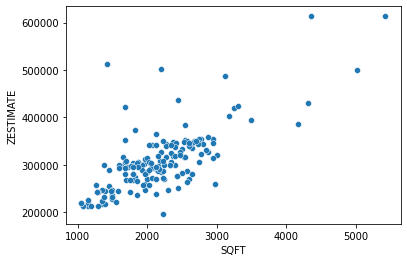

In [49]:
import seaborn as sns
sns.scatterplot(x="SQFT", y="ZESTIMATE", data=df2)

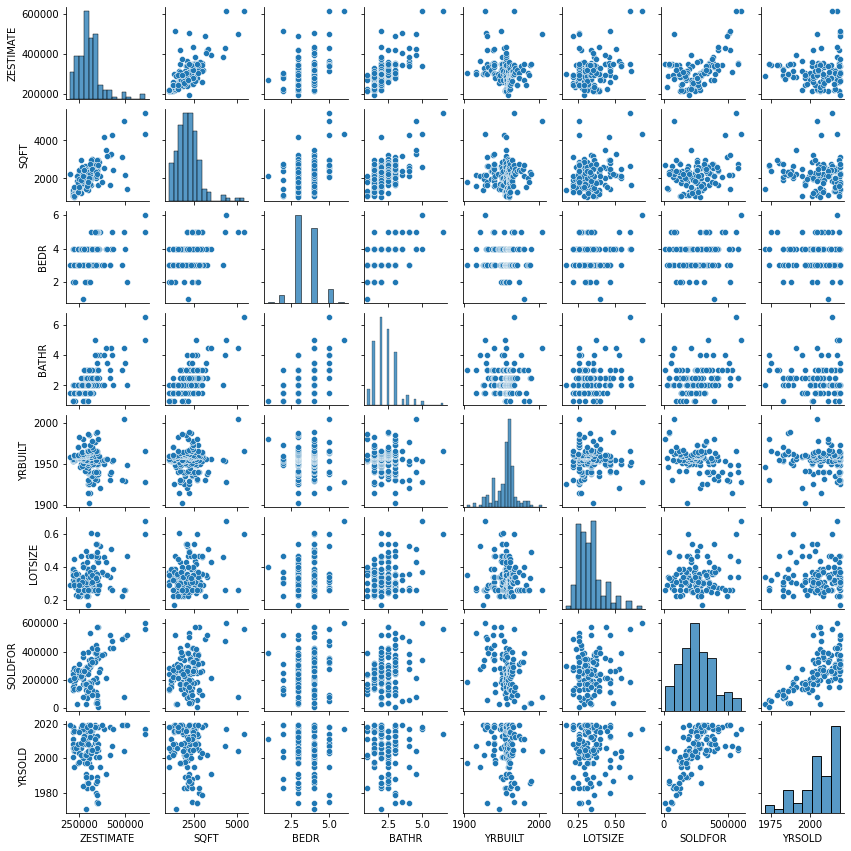

In [50]:
sns.pairplot(df2[['ZESTIMATE', 'SQFT', 'BEDR', 'BATHR',
       'YRBUILT', 'LOTSIZE', 'SOLDFOR', 'YRSOLD']], height=1.5)

Remember that our dependent variables (that is, the ones that we are mostly interested in explaining or predicting) will be ZESTIMATE or SOLDFOR.  Which variables have the most obvious linear relationships?

In [51]:
corr = df2.corr()
corr.style.background_gradient()

,ID,STREETNO,ZESTIMATE,SQFT,BEDR,BATHR,YRBUILT,LOTSIZE,SOLDFOR,YRSOLD,FACEWEST,ORCHARD,AGE,COVERAGE,SALESAGE
ID,1.000000,0.340771,-0.444298,-0.214015,-0.003133,-0.279344,0.433442,-0.246499,-0.377508,-0.084401,0.055136,-0.551437,-0.433442,-0.041792,-0.326252
STREETNO,0.340771,1.000000,-0.422981,-0.245099,-0.034934,-0.262255,0.209009,-0.156489,-0.130535,0.102945,-0.077593,-0.003471,-0.209009,-0.141681,-0.091706
ZESTIMATE,-0.444298,-0.422981,1.000000,0.734791,0.363996,0.706982,-0.192363,0.340007,0.497601,0.047970,0.079028,0.462197,0.192363,0.443482,0.154023
SQFT,-0.214015,-0.245099,0.734791,1.000000,0.405574,0.657077,0.068036,0.276527,0.280854,-0.069698,0.014737,0.216624,-0.068036,0.700833,-0.115892
BEDR,-0.003133,-0.034934,0.363996,0.405574,1.000000,0.494798,0.009682,0.136471,0.175498,-0.042371,0.034423,0.108869,-0.009682,0.281619,-0.031620
BATHR,-0.279344,-0.262255,0.706982,0.657077,0.494798,1.000000,-0.078297,0.251942,0.286011,-0.056447,0.010095,0.240659,0.078297,0.408259,0.015043
YRBUILT,0.433442,0.209009,-0.192363,0.068036,0.009682,-0.078297,1.000000,-0.046505,-0.399611,-0.154098,0.006535,-0.477742,-1.000000,0.083999,-0.799450
LOTSIZE,-0.246499,-0.156489,0.340007,0.276527,0.136471,0.251942,-0.046505,1.000000,0.132217,0.003346,0.033198,0.095781,0.046505,-0.449177,0.035930
SOLDFOR,-0.377508,-0.130535,0.497601,0.280854,0.175498,0.286011,-0.399611,0.132217,1.000000,0.635992,0.087477,0.567511,0.399611,0.143302,0.668708
YRSOLD,-0.084401,0.102945,0.047970,-0.069698,-0.042371,-0.056447,-0.154098,0.003346,0.635992,1.000000,0.119038,0.166118,0.154098,-0.072761,0.716751
